In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
GCP = pd.read_csv('German_Credit_Preped.csv')

In [8]:
GCP.head().transpose()

,0,1,2,3,4
customer_id,1122334,6156361,2051359,8740590,3924540
checking_account_status,< 0 DM,0 - 200 DM,none,< 0 DM,< 0 DM
loan_duration_mo,6,48,12,42,24
credit_history,critical account - other non-bank loans,current loans paid,critical account - other non-bank loans,current loans paid,past payment delays
purpose,radio/television,radio/television,education,furniture/equipment,car (new)
loan_amount,1169,5951,2096,7882,4870
savings_account_balance,unknown/none,< 100 DM,< 100 DM,< 100 DM,< 100 DM
time_employed_yrs,>= 7 years,1 - 4 years,4 - 7 years,4 - 7 years,1 - 4 years
payment_pcnt_income,4,2,2,2,3
gender_status,male-single,female-divorced/separated/married,male-single,male-single,male-single


In [16]:
credit_counts = GCP['bad_credit'].value_counts()

In [17]:
credit_counts

0    700
1    300
Name: bad_credit, dtype: int64

Prepare data

In [19]:
GCP.head(2)

,customer_id,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,1122334,< 0 DM,6,critical account - other non-bank loans,radio/television,1169,unknown/none,>= 7 years,4,male-single,...,real estate,67,none,own,2,skilled,1,yes,yes,0
1,6156361,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,...,real estate,22,none,own,1,skilled,1,none,yes,1


In [21]:
GCP.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_id,1000.0,5396745.023,2.571692e+06,1018706.0,3196781.0,5405983.0,7531105.75,9994482.0
loan_duration_mo,1000.0,20.903,1.205881e+01,4.0,12.0,18.0,24.00,72.0
loan_amount,1000.0,3271.258,2.822737e+03,250.0,1365.5,2319.5,3972.25,18424.0
payment_pcnt_income,1000.0,2.973,1.118715e+00,1.0,2.0,3.0,4.00,4.0
time_in_residence,1000.0,2.845,1.103718e+00,1.0,2.0,3.0,4.00,4.0
age_yrs,1000.0,35.546,1.137547e+01,19.0,27.0,33.0,42.00,75.0
number_loans,1000.0,1.407,5.776545e-01,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,3.620858e-01,1.0,1.0,1.0,1.00,2.0
bad_credit,1000.0,0.300,4.584869e-01,0.0,0.0,0.0,1.00,1.0


In [23]:
#Seperate Label from data
y_target = GCP['bad_credit']
new_credit = GCP.drop(['bad_credit','customer_id'],axis=1)

In [25]:
new_credit.shape

(1000, 20)

# ENCODE Categorical Features

In [27]:
new_credit.head(2)

,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,time_in_residence,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker
0,< 0 DM,6,critical account - other non-bank loans,radio/television,1169,unknown/none,>= 7 years,4,male-single,none,4,real estate,67,none,own,2,skilled,1,yes,yes
1,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,none,2,real estate,22,none,own,1,skilled,1,none,yes


In [28]:
new_credit.dtypes

checking_account_status     object
loan_duration_mo             int64
credit_history              object
purpose                     object
loan_amount                  int64
savings_account_balance     object
time_employed_yrs           object
payment_pcnt_income          int64
gender_status               object
other_signators             object
time_in_residence            int64
property                    object
age_yrs                      int64
other_credit_outstanding    object
home_ownership              object
number_loans                 int64
job_category                object
dependents                   int64
telephone                   object
foreign_worker              object
dtype: object

In [40]:
cat_col = []

cat_index = list(new_credit.dtypes.index)

for i, cat in enumerate(new_credit.dtypes):
    if cat == 'object':
        cat_col.append(cat_index[i])

In [53]:
#Print the value count

for cat in cat_col:
    print('Unique value for',cat)
    count = GCP[cat].value_counts()
    print(count)
    print('----------------')
    print('\n')

Unique value for checking_account_status
none                             394
< 0 DM                           274
0 - 200 DM                       269
> 200 DM or salary assignment     63
Name: checking_account_status, dtype: int64
----------------


Unique value for credit_history
current loans paid                         530
critical account - other non-bank loans    293
past payment delays                         88
all loans at bank paid                      49
no credit - paid                            40
Name: credit_history, dtype: int64
----------------


Unique value for purpose
radio/television       280
car (new)              234
furniture/equipment    181
car (used)             103
business                97
education               50
repairs                 22
other                   12
domestic appliances     12
retraining               9
Name: purpose, dtype: int64
----------------


Unique value for savings_account_balance
< 100 DM         603
unknown/none     183
10

In [42]:
new_credit.describe()

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


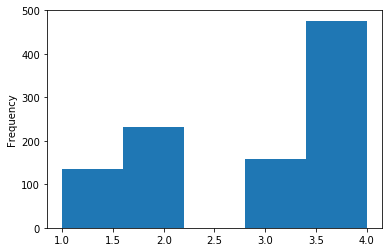

In [48]:
new_credit['payment_pcnt_income'].plot.hist(bins=5)

CONVERT CATEGORICAL FEATURES TO NUMERICAL FEATURES

To transform categorical features into numerical features You can use the pandas get_dummies function when working with smaller categories

In [49]:
print("shape of the data encoding is",new_credit.shape)

shape of the data encoding is (1000, 20)


In [51]:
new_credit = pd.get_dummies(new_credit)
print('New shape of data after encoding is',new_credit.shape)

New shape of data after encoding is (1000, 61)


In [52]:
new_credit.head()

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,checking_account_status_0 - 200 DM,checking_account_status_< 0 DM,checking_account_status_> 200 DM or salary assignment,...,home_ownership_own,home_ownership_rent,job_category_highly skilled,job_category_skilled,job_category_unemployed-unskilled-non-resident,job_category_unskilled-resident,telephone_none,telephone_yes,foreign_worker_no,foreign_worker_yes
0,6,1169,4,4,67,2,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
1,48,5951,2,2,22,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,0,0,1,1,0,0,1
3,42,7882,2,4,45,1,2,0,1,0,...,0,0,0,1,0,0,1,0,0,1
4,24,4870,3,4,53,2,2,0,1,0,...,0,0,0,1,0,0,1,0,0,1


# NORMALIZE OUR DATA

In [54]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [73]:
scaler = StandardScaler()
scaler.fit(new_credit)
new_credit2 = scaler.transform(new_credit)

# Split data into training and test set

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(new_credit2,y_target,test_size = 0.2)

In [59]:
print('Shape of training data is', X_train.shape)
print('Shape of training target is',y_train.shape)
print('Shape of test data is',X_test.shape)
print('shape of test target is', y_test.shape)

Shape of training data is (800, 61)
Shape of training target is (800,)
Shape of test data is (200, 61)
shape of test target is (200,)


# Modelling using machine learning algorithm

Logic regression model

In [60]:
from sklearn.linear_model import LogisticRegression

In [62]:
Logic_rex = LogisticRegression()
Logic_rex.fit(X_train,y_train)


C:\Users\GIFT OSCAR\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
Logic_pred = Logic_rex.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [67]:
acc = accuracy_score(y_test,Logic_pred)
print("Accuracy is ",round(acc * 100))

Accuracy is  76.0


In [70]:
conf = confusion_matrix(y_test,Logic_pred)

In [71]:
print('                 Score positive    Score negative')
print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
print('')

                 Score positive    Score negative
Actual positive       118                16
Actual negative        32                34

